# Loading CMIP6 data and detrend on a monthly basis.

Imports

In [10]:
%matplotlib inline
import pandas as pd
import xarray as xr

Read in the previously saved list of paths and files from ``00_find_data.ipynb``.

In [2]:
data_list = pd.read_csv('/glade/scratch/molina/CMIP6_pathnames.csv')

Check path for a piControl

In [24]:
data_list.path[3]

'/glade/collections/cmip/CMIP6/CMIP/BCC/BCC-CSM2-MR/piControl/r1i1p1f1/Amon/tas/gn/v20181016/tas/tas_Amon_BCC-CSM2-MR_piControl_r1i1p1f1_gn_185001-244912.nc'

load piControl data into xarray dataset 

In [25]:
first_data = xr.open_dataset(data_list.path[3])

Check metadata

In [26]:
first_data

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 160, lon: 320, time: 7200)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2449-12-16 12:00:00
  * lat        (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon        (lon) float64 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                The coupled model starts from model state after 3...
    contact:                Dr. Tongwen Wu (twwu@cma.gov.cn)
    creation_date:          2018-10-16T02:24:49Z
    data_specs_version:     01.00.27
    description:        

check the time series of the data quickly

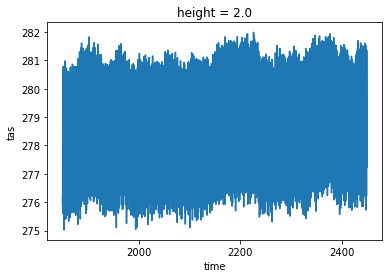

In [28]:
first_data['tas'].mean(dim=['lat','lon']).plot()

Compute the monthly means for each grid cell.

In [5]:
monthly_climo = first_data['tas'].groupby('time.month').mean()

check computation

In [6]:
monthly_climo

<xarray.DataArray 'tas' (month: 12, lat: 160, lon: 320)>
array([[[246.46318, 246.44609, 246.42638, ..., 246.52141, 246.50377,
         246.48366],
        [247.2308 , 247.1838 , 247.13622, ..., 247.37428, 247.32568,
         247.27876],
        [247.76039, 247.68404, 247.60968, ..., 247.99704, 247.91534,
         247.83847],
        ...,
        [241.78117, 241.80714, 241.8468 , ..., 241.67462, 241.70088,
         241.74919],
        [241.64143, 241.6654 , 241.70596, ..., 241.57912, 241.60379,
         241.6245 ],
        [241.49205, 241.52086, 241.55045, ..., 241.48918, 241.48901,
         241.48892]],

       [[236.15422, 236.12286, 236.09662, ..., 236.23705, 236.20892,
         236.1808 ],
        [237.06494, 237.00374, 236.93785, ..., 237.24892, 237.18826,
         237.12709],
        [237.71695, 237.61186, 237.5037 , ..., 238.03821, 237.93509,
         237.82372],
        ...,
        [241.02356, 241.05215, 241.09435, ..., 240.91505, 240.94006,
         240.98793],
        [240.91

compute anomalies, removal of monthly mean signal

In [31]:
demonthlied_data = first_data['tas'].groupby('time.month') - monthly_climo

Check data

In [32]:
demonthlied_data

<xarray.DataArray 'tas' (time: 7200, lat: 160, lon: 320)>
array([[[-0.05981445, -0.06990051, -0.06048584, ..., -0.05508423,
         -0.05447388, -0.05430603],
        [-0.3087921 , -0.32019043, -0.33610535, ..., -0.27249146,
         -0.28196716, -0.29637146],
        [-0.92129517, -0.93084717, -0.95777893, ..., -0.83036804,
         -0.8591919 , -0.8952637 ],
        ...,
        [-3.2126465 , -3.2257996 , -3.2425232 , ..., -3.1344452 ,
         -3.1564178 , -3.1940765 ],
        [-3.025177  , -3.0394745 , -3.0628815 , ..., -2.9753418 ,
         -2.9956665 , -3.0119934 ],
        [-2.9049225 , -2.9290009 , -2.953476  , ..., -2.901657  ,
         -2.9018097 , -2.9020386 ]],

       [[-1.9471741 , -1.9431305 , -1.9595184 , ..., -1.9032898 ,
         -1.9018555 , -1.9338531 ],
        [-2.7069397 , -2.716034  , -2.7570953 , ..., -2.6328278 ,
         -2.659134  , -2.6813202 ],
        [-3.3195038 , -3.3979187 , -3.4315796 , ..., -3.2280426 ,
         -3.2957    , -3.2936707 ],
        .

In [40]:
demonthlied_data.lon

<xarray.DataArray 'lon' (lon: 320)>
array([  0.   ,   1.125,   2.25 , ..., 356.625, 357.75 , 358.875])
Coordinates:
    height   float64 ...
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9
Attributes:
    bounds:         lon_bnds
    units:          degrees_east
    axis:           X
    long_name:      Longitude
    standard_name:  longitude

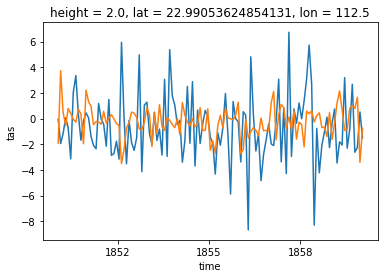

In [43]:
demonthlied_data.sel(time=slice('1850-01-16T12:00:00','1860-01-16T12:00:00')).isel(lat=0,lon=0).plot()
demonthlied_data.sel(time=slice('1850-01-16T12:00:00','1860-01-16T12:00:00')).isel(lat=100,lon=100).plot()